In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Define sequences (from fastas) and load SASA files

In [2]:
seq = 'MVTTFVALYDYESRTETDLSFKKGERLQIVNNTEGDWWLAHSLSTGQTGYIPSNYVAPSDSIQAEEWYFGKITRRESERLLLNAENPRGTFLVRESETTKGAYCLSVSDFDNAKGLNVKHYKIRKLDSGGFYITSRTQFNSLQQLVAYYSKHADGLCHRLTTVCPTSKPQTQGLAKDAWEIPRESLRLEVKLGQGCFGEVWMGTWNGTTRVAIKTLKPGTMSPEAFLQEAQVMKKLRHEKLVQLYAVVSEEPIYIVTEYMSKGSLLDFLKGETGKYLRLPQLVDMAAQIASGMAYVERMNYVHRDLRAANILVGENLVCKVADFGLARLIEDNEYTARQGAKFPIKWTAPEAALYGRFTIKSDVWSFGILLTELTTKGRVPYPGMVNREVLDQVERGYRMPCPPECPESLHDLMCQCWRKEPEERPTFEYLQAFLEDYFTSTEPQYQPGENL'

closed_sasa = np.loadtxt('../../PyMOL/sasa/2src_human_numbering_SASA.txt')
open_sasa = np.loadtxt('../../PyMOL/sasa/1y57_human_numbering_SASA.txt')


In [11]:
# Transform into single DF
open_df = pd.DataFrame(open_sasa[:, 1], index=open_sasa[:, 0], columns=['open'])
closed_df = pd.DataFrame(closed_sasa[:, 1], index=closed_sasa[:, 0], columns=['closed'])
open_df['closed'] = closed_df['closed']

sasa_df = open_df.copy()

# Clean up DataFrame

# Drop nans
sasa_df.dropna(axis=0, inplace=True)

# Rename index
int_idx = [int(pos) for pos in sasa_df.index.tolist()]
mapper = dict(zip(sasa_df.index.tolist(), int_idx))
sasa_df.rename(mapper, axis='index', inplace=True)

# Get difference
diff_sasa = sasa_df['open'] - sasa_df['closed']

In [38]:
sasa_df['diff_sasa'] = diff_sasa.values

In [39]:
sasa_df

,open,closed,diff_sasa
87,10.419711,155.065506,-144.645795
88,4.026346,23.810478,-19.784132
89,45.161861,41.332947,3.828915
90,53.048244,25.043711,28.004534
91,61.447132,4.974362,56.472770
...,...,...,...
529,78.006577,164.137619,-86.131042
530,36.725750,400.903290,-364.177540
531,150.837097,80.156174,70.680923
532,78.025726,120.916122,-42.890396


In [40]:
sasa_df.to_csv('../../utils/analysis_utils/sasa.csv')

In [26]:
def moving_average(a, n=15) :
    ret = np.nancumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

# Get positions and values in lists
diff_sasa_pos = diff_sasa.index.tolist()
diff_sasa_vals = diff_sasa.tolist()

# Window the SASA values
window_sasa = moving_average(diff_sasa_vals)

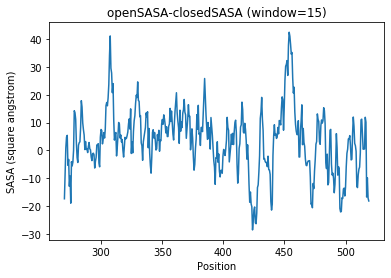

In [27]:
plt.plot(np.linspace(270, 519, num=len(window_sasa)), window_sasa)
plt.xlabel('Position')
plt.ylabel('SASA (square angstrom)')
plt.title('openSASA-closedSASA (window=15)')
plt.show()

In [29]:
np.argmax(window_sasa)

319

In [30]:
np.linspace(270, 519, num=len(window_sasa))[319]

453.86805555555554

In [31]:
window_sasa[319] = 0.0

In [32]:
np.argmax(window_sasa)

65

In [33]:
np.linspace(270, 519, num=len(window_sasa))[65]

307.46527777777777

In [34]:
np.argmin(window_sasa)

267

In [35]:
np.linspace(270, 519, num=len(window_sasa))[267]

423.8958333333333